# Anomaly Analysis

In [12]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [53]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  
media_volt=reference_volt_curves["media"]
reference_curr_curves= pd.read_pickle("../data/reference/reference_current_curves.pkl")  
media_curr=reference_curr_curves["media"]

In [14]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [47]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

## Analisi anomalie di Voltage

In [16]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

### Plot delle curve per specfico spotname

In [49]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

#### Plot sulla base di voltage_drop

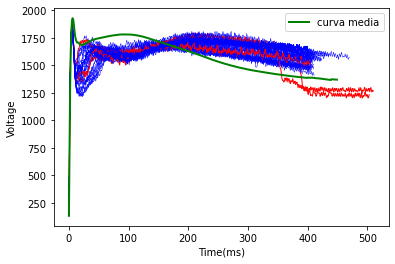

In [68]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend();

#### Plot sulla base di %volt_anomalies

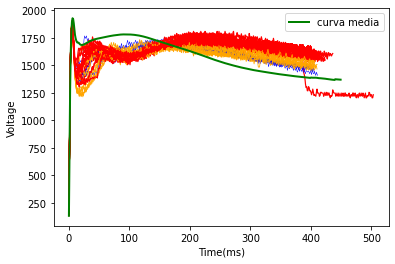

In [64]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["%volt_anomalies"][i]>40:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1.2)
    if 5<val_indice["%volt_anomalies"][i]<40:
        colore="orange"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%volt_anomalies"][i]<5:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend();

#### Plot sulla base di iForest

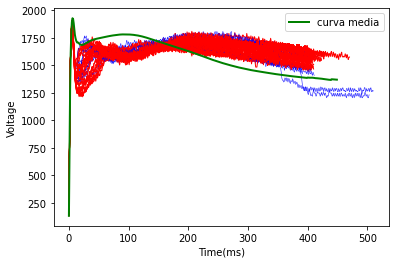

In [70]:
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["iForest_volt"][i]==1:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1) 
plt.plot(media_volt[:450],linewidth=2,c="green",label="curva media")
plt.legend(); 

## Analisi anomalie di Current

In [36]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

### Plot delle curve per specfico spotname

In [72]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

#### Plot sulla base di %current_anomalies

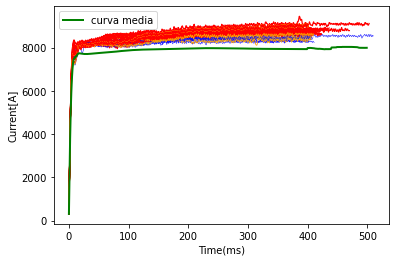

In [73]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["%current_anomalies"][i]>50:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1.2)
    if 20<val_indice["%current_anomalies"][i]<50:
        colore="orange"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%current_anomalies"][i]<20:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.legend(); 

#### Plot sulla base di iForest

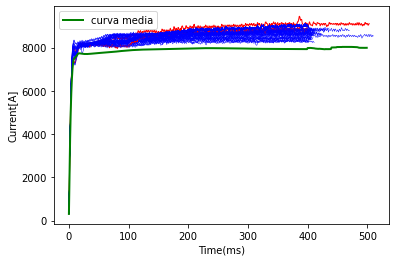

In [76]:
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)  
plt.plot(media_curr[:500],linewidth=2,c="green",label="curva media")
plt.legend(); 